<a href="https://colab.research.google.com/github/HanamDavid/visual_computing/blob/main/2025-04-15_taller1_transformaciones/python/taller1_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports and Images**

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
import imageio as iio

## Upload Personal Image

In [ ]:
#


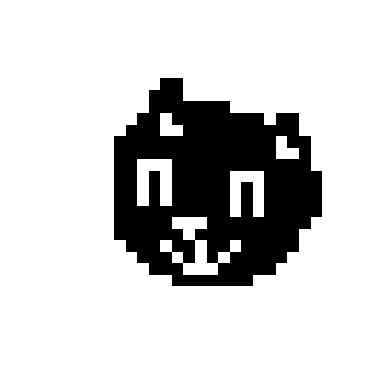

In [5]:
def show_image(image_data):
  plt.imshow(image_data)
  plt.axis('off') # Ocultar ejes
  plt.show()
show_image(image)

# **Functions**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import imageio

def translation(image, y_trans=0, x_trans=0):
  height, width, channels = image.shape
  translated_image = np.zeros_like(image)
  for idx_row in range(height):
    for idx_col in range(width):
      value = image[idx_row, idx_col]
      new_row=idx_row+y_trans
      new_col=idx_col+x_trans
      if 0 <= new_row < height and 0 <= new_col < width:
                translated_image[new_row, new_col] = value
  return translated_image

def rot(image, degree):
    """Aplica una rotación a la imagen."""
    height, width, channels = image.shape
    rotated_image = np.zeros_like(image)
    rad = np.deg2rad(degree)
    cos_theta = np.cos(rad)
    sin_theta = np.sin(rad)
    center_x, center_y = width // 2, height // 2

    for y in range(height):
        for x in range(width):
            offset_x = x - center_x
            offset_y = y - center_y
            new_x = int(offset_x * cos_theta - offset_y * sin_theta + center_x)
            new_y = int(offset_x * sin_theta + offset_y * cos_theta + center_y)
            if 0 <= new_y < height and 0 <= new_x < width:
                rotated_image[y, x] = image[new_y, new_x]
    return rotated_image

def scale(image, value):
    """Aplica un escalado a la imagen."""
    height, width, channels = image.shape
    new_height = int(height * value)
    new_width = int(width * value)
    scaled_image = np.zeros((new_height, new_width, channels), dtype=image.dtype)
    for y_new in range(new_height):
        for x_new in range(new_width):
            y_orig = int(y_new / value)
            x_orig = int(x_new / value)
            if 0 <= y_orig < height and 0 <= x_orig < width:
                scaled_image[y_new, x_new] = image[y_orig, x_orig]
    return scaled_image

def create_animated_gif(image, filename="animated_transformation.gif", duration=0.1):
    """Crea un GIF animado aplicando transformaciones a la imagen."""
    frames = []
    num_frames = 30  # Número de fotogramas en la animación
    original_height, original_width, _ = image.shape

    for i in range(num_frames):
        t = i / (num_frames - 1)  # Valor de tiempo normalizado entre 0 y 1

        # Aplicar transformaciones
        translated_frame = translation(image, int(-10 * t), int(-5 * t))
        rotated_frame = rot(translated_frame, 360 * t)
        scaled_frame_temp = scale(rotated_frame, 1 + 0.5 * t)

        # Resize the scaled frame back to the original dimensions
        from PIL import Image
        scaled_pil = Image.fromarray(scaled_frame_temp.astype(np.uint8))
        resized_pil = scaled_pil.resize((original_width, original_height), Image.Resampling.LANCZOS)
        scaled_frame = np.array(resized_pil)

        frames.append(scaled_frame)
        print(f"Generando fotograma {i+1}/{num_frames}", end='\r')

    print("\nGenerando GIF...")
    imageio.mimsave(filename, [frame.astype(np.uint8) for frame in frames], duration=duration)
    print(f"GIF animado guardado como {filename}")

show_image(image)
new_image=translation(image,-5,-10)
show_image(new_image)
new_image=scale(image,2)
show_image(new_image)
new_image=rot(image,45)
show_image(new_image)
create_animated_gif(image, duration=0.05)

# Main
Please first upload or make an image